### Isabella Salgado Pinzón - 201730418
### Juan Pablo Naranjo - 201730006

# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de GridSearch con el fin de buscar los mejores hiperparámetros de distintos modelos dentro de un rango de valores definidos por nosotros mismos. Igualmente, se busca que usted aplique y comprenda los siguientes modelos:

- Árboles de decisión
- Bosques de decisión
- AdaBoost
- XGBoost
- Bagging

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. La fecha límite de entrega es el día **8 de noviembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

Lectura de CSV y borrado de filas incompletas.

In [2]:
df = pd.read_csv('waterPotability/water_potability.csv').dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

<AxesSubplot:ylabel='Potability'>

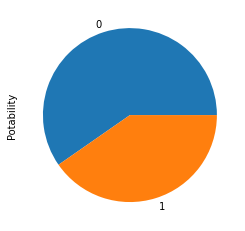

In [3]:
df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

Utilizaremos la función `resample` de SciKit-Learn para remuestrear algunas muestras entre la clase '1'.

In [4]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

<AxesSubplot:ylabel='Potability'>

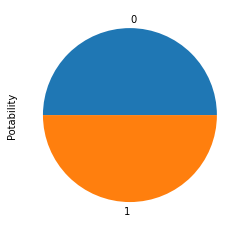

In [5]:
df['Potability'].value_counts().plot(kind='pie')

In [6]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

## Parte 1: Prueba de Modelos y GridSearch/RandomizedSearch

A continuación, realizaremos un procedimiento de búsqueda del mejor modelo y sus correspondientes hiperparámetros. Estos procedimientos se conocen como GridSearch/RandomizedSearch. Puede encontrar más información en los siguientes enlaces:

- [GridSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RandomizedSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [GridSearchCV](https://www.mygreatlearning.com/blog/gridsearchcv/)
- [Medium Article: GridSearch & RandomizedSearch](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Partición de datos de prueba/entrenamiento.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Utilice la función train_test_split #

## Parte 1A

### Definición de Parámetros de GridSearch/RandomizedSearch

Basado en la documentación de las funciones, defina los siguientes parámetros para los casos:

- GridSearch:
    - Árbol de Decisión (GridSearch):
        - 'criterion': 'gini' y 'entropy'
        - 'max_depth': vector de valores enteros entre 1 y 50
        - 'min_samples_leaf': 10 valores seleccionados por usted entre 1 y 100
    
    - Random Forest (GridSearch):
        - 'n_estimators': 4 valores seleccionados por usted entre 100 y 500
        - 'min_samples_leaf': 3 valores seleccionados por usted entre 2 y 30
        
    - AdaBoost (GridSearch):
        - 'n_estimators': 6 valores seleccionados por usted entre 50 y 600
        - 'learning_rate': 5 valores de tasas de aprendizaje entre 0 y 1
        
    - XGBoost (RandomizedSearch):
        - 'n_estimators': 8 valores seleccionados por usted entre 50 y 600
        - 'learning_rate': 5 valores de tasas de aprendizaje entre 0 y 1
    

In [9]:
# Búsqueda de Hiperparámetros

lr = LogisticRegression(random_state=42)

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

# Árbol de Decisión
para_dt = {'criterion': ["gini", "entropy"], 'max_depth': np.arange(1, 51), 'min_samples_leaf': [1, 45, 65, 8, 23, 89, 95, 32, 3, 12]} # Diccionario con parámetros GridSearch/RandomizedSearch # }
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)

# Random Forest
#n_estimators: número de árboles en el bosque.
params_rf = {'n_estimators': [394, 420, 210, 169], 'min_samples_leaf': [3, 20, 11]} # Diccionario con parámetros GridSearch/RandomizedSearch # }
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

# AdaBoost
params_ada = {'n_estimators': [69, 420, 599, 170, 127, 116], 'learning_rate': [0.2, 0.42, 0.69, 0.08, 0.12]} # Diccionario con parámetros GridSearch/RandomizedSearch # }
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

# XGBoost
params_xgb = {'n_estimators': [99, 57, 355, 367, 595, 271, 193, 469], 'learning_rate': [0.47, 0.10, 0.07, 0.88, 0.61]} # Diccionario con parámetros GridSearch/RandomizedSearch # }
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

### Búsqueda de Hiperparámetros

A continuación se debe realizar el proceso de GridSearch. Esta operación puede tardar.

In [10]:
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                      

In [11]:
print("Mejores parámetros Árbol de Decisión:", grid_dt.best_params_)
print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejores parámetros AdaBoost:", grid_ada.best_params_)
print("Mejores parámetros XGBoost:", rs_xgb.best_params_)

Mejores parámetros Árbol de Decisión: {'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 1}
Mejores parámetros Random Forest: {'min_samples_leaf': 3, 'n_estimators': 169}
Mejores parámetros AdaBoost: {'learning_rate': 0.69, 'n_estimators': 599}
Mejores parámetros XGBoost: {'n_estimators': 469, 'learning_rate': 0.07}


In [12]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 1}

## Parte 1B

### Boosting & Bagging

Para este caso utilice 100 clasificadores de Árbol de Decisión con los mejores parámetros obtenidos a partir del GridSearch realizado anteriormente.

In [21]:
dt2 = DecisionTreeClassifier(criterion='gini', max_depth=39, min_samples_leaf=1)

# Boosting & Bagging
bagging = BaggingClassifier(base_estimator=dt2, n_estimators=100)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=39),
                  n_estimators=100)

### Métricas de Evaluación

A continuación podrá observar un resumen con las precisiones de cada modelo y posteriormente su representación gráfica.

In [22]:
classifiers = [('Regresión Logística', lr),
               ('Árbol de Decisión', dt), ('Random Forest', rf), ('AdaBoost', ada),
               ('Bagging', bagging), ('XGBoost', xgb)]

In [23]:
from sklearn.metrics import accuracy_score

classifier_names = []
classifier_acc = []
for classifier_name, classifier in classifiers:
 
    # Ajuste para datos de entrenamiento
    classifier.fit(X_train, y_train)    

    # Predicciones
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Evaluación del clasificador
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))
    classifier_names.append(classifier_name)
    classifier_acc.append(accuracy)

Regresión Logística : 0.50
Árbol de Decisión : 0.74
Random Forest : 0.81
AdaBoost : 0.57
Bagging : 0.79
XGBoost : 0.74


# Resultados Preliminares

<BarContainer object of 6 artists>

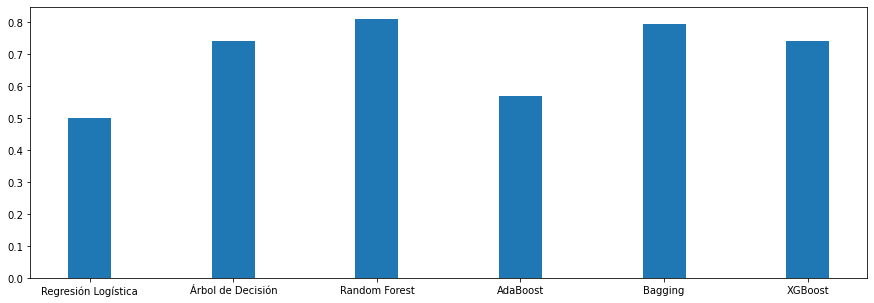

In [24]:
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_acc, width=0.3)

## Parte 2

### Análisis de Resultados

Ahora usted utilizará la función `classication_report` para determinar qué clasificador se ajusta más a los resultados buscados, teniendo en cuenta el contexto del problema y la simplicidad de cada modelo.

### Random Forest

In [25]:
from sklearn.metrics import classification_report

y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       258
           1       0.80      0.79      0.79       222

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



### Árbol de Decisión

In [26]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       258
           1       0.68      0.83      0.75       222

    accuracy                           0.74       480
   macro avg       0.75      0.75      0.74       480
weighted avg       0.76      0.74      0.74       480



### XGBoost

In [27]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       258
           1       0.70      0.77      0.73       222

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.75      0.74      0.74       480



### Bagging de Árboles de Decisión

In [28]:
y_pred_bagging = bagging.predict(X_test)
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       258
           1       0.77      0.80      0.78       222

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



## Conclusiones

- Es claro que entre todos los modelos, el modelo de árbol de decisión es el modelo menos complejo, y esto se ve reflejado en su accuracy score, que fue el más bajo para todos los modelos probados. 
- Se encontró que el calsificador de bagging de árboles de decisión tuvo un accuracy score de 0.79, mientras que el clasificador de Random Forest tuvo un accuracy score de 0.81. Es normal encontrar que tengan puntajes similares porque ambos son clasificadores prácticamente iguales con la diferencia de que hacer bagging de árboles de decisión tiene en cuenta todas las características de las clases para la clasificación, mientras que el Random Forest solo tiene en cuenta un subconjunto de las características.
- XGBoost está basado en árboles de decisión y utiliza una técnica llamada gradient boosting para hacer la clasificación. Se puede decir que este clasificador obtuvo un accuracy score menor en comparación con el Random Forest o el Bagging de árboles de decisión por el hecho de que el clasificador se construyó usando RandomizedSearch, que no tiene en cuenta todos los hiperparámetros para encontrar los óptimos, a diferencia del método de GridSearch, que sí busca entre todos los hiperparámetros para encontrar los óptimos.
- En GridSearch se prueban todas las posibles combinaciones de los parámetros de interés para así encontrar los mejores. Mientras tanto, en RandomizedSearch se utilizan solo algunos de ellos. Este último es muy útil cuando se tiene un número muy grande de parámetros y el tiempo de entrenamiento es bastante alto. Sin embargo, cuando este no es el caso, siempre es mejor utilizar GridSearch.
- En el contexto del problema, hay un costo mayor de tener falsos positivos dado a que si se identifica un agua como potable cuando en verdad no lo es y se utiliza para propósitos de alimentación o salubridad, puede ser muy peligroso para la salud de las personas. Por lo tanto, nos interesa escoger un clasificador que incurra en un menor porcentaje de falsos positivos. Para esto, se priorizará el clasificador cuya medida de precisión sea la más alta, pues entre mayor sea esta medida de efectividad de búsqueda, indica que hay menor tasa de falsos positivos. Teniendo lo anterior en cuenta, se escoge como mejor clasificador el clasificador de **random forest**, pues además de haber arrojado el mayor valor de accuracy score entre los clasificadores probados, también tuvo el promedio de precisión más alto de todos, demostrando su baja tasa de falsos positivos.
- Una desventaja de escoger un clasificador muy complejo es el hecho de que tiene el costo computacional más alto asociado. Por esta razón se puede recurrir a los otros métodos que son más simples pero que pueden llegar a sacrificar precisión y exactitud en la clasificación.